In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

sb.set()

In [122]:
raw_data = pd.read_csv('India_Menu.csv')
raw_data

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [123]:
raw_data.describe(include='all')

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
unique,7,141,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,McCafe Menu,McVeggie™ Burger,299 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,51,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,NaN,NaN,NaN,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,NaN,NaN,NaN,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,NaN,NaN,NaN,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000


## Cleaning data

In [124]:
# Removing missing value's observation

data = raw_data.dropna(axis=0)
data = data.reset_index(drop=True)

In [125]:
length = data['Per Serve Size'].size
raw_serving_size = []

for i in range(0,length):
    raw_serving_size.append(float(data.at[i,'Per Serve Size'].split(' ')[0]))

data['Raw Per Serve Size'] = raw_serving_size

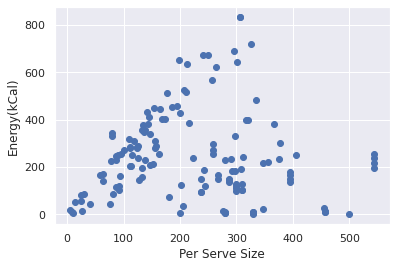

In [126]:
# plotting data

plt.scatter(data['Raw Per Serve Size'],data['Energy (kCal)'])
plt.xlabel('Per Serve Size')
plt.ylabel('Energy(kCal)')
plt.show()

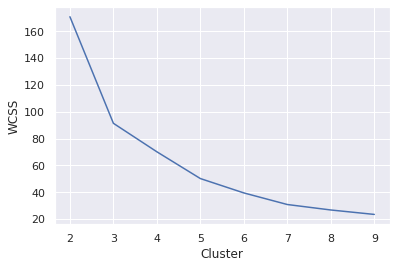

In [127]:
# using elbow method to identify enfficient clusters

from sklearn import preprocessing

wcss = []
x = data[['Raw Per Serve Size','Energy (kCal)']]

scaled_x = preprocessing.scale(x)

for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10),wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

In [128]:
# generating clusters

clusters = []

for i in range(2, 10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_x)
    clusters.append(kmeans.fit_predict(scaled_x))

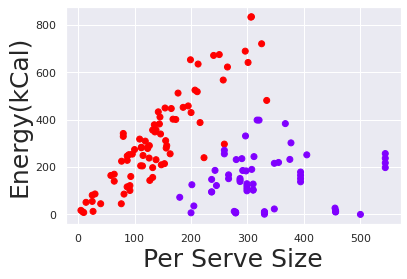

In [129]:
# 2 clusters

plt.scatter(data['Raw Per Serve Size'],data['Energy (kCal)'],c=clusters[0],cmap='rainbow')
plt.xlabel('Per Serve Size', fontsize=25)
plt.ylabel('Energy(kCal)', fontsize=25)
plt.show()

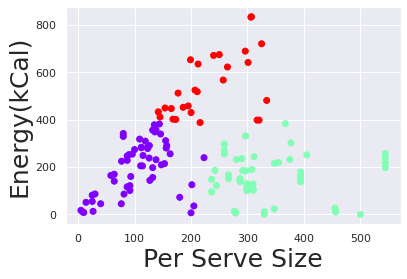

In [130]:
# 3 clusters

plt.scatter(data['Raw Per Serve Size'],data['Energy (kCal)'],c=clusters[1],cmap='rainbow')
plt.xlabel('Per Serve Size', fontsize=25)
plt.ylabel('Energy(kCal)', fontsize=25)
plt.show()

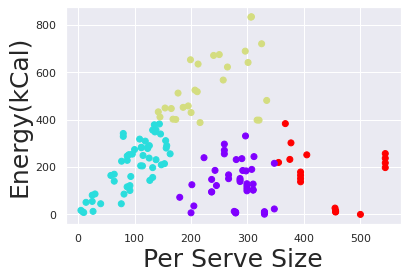

In [131]:
# 4 clusters

plt.scatter(data['Raw Per Serve Size'],data['Energy (kCal)'],c=clusters[2],cmap='rainbow')
plt.xlabel('Per Serve Size', fontsize=25)
plt.ylabel('Energy(kCal)', fontsize=25)
plt.show()

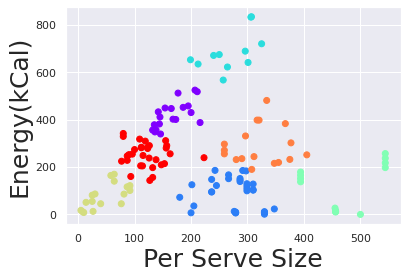

In [132]:
# 7 clusters (truthful)

plt.scatter(data['Raw Per Serve Size'],data['Energy (kCal)'],c=clusters[5],cmap='rainbow')
plt.xlabel('Per Serve Size', fontsize=25)
plt.ylabel('Energy(kCal)', fontsize=25)
plt.show()